In [28]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [29]:
data_path = "../project-4-group-6/Resources/processed_data.csv"

data = pd.read_csv(data_path)

In [30]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.135590,...,0.025229,0.071730,0.085824,0.034172,0.766779,0.209015,0.108435,0.291215,0.035301,0.356034
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.342353,...,0.156819,0.258041,0.280104,0.181671,0.422883,0.406606,0.310930,0.454323,0.184539,0.478826
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X = data.copy()
X.drop("HeartDisease", axis=1, inplace=True)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [33]:
y = data["HeartDisease"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

In [34]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [35]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (239846, 38)
Training Labels Shape: (239846,)
Testing Features Shape: (79949, 38)
Testing Labels Shape: (79949,)


In [36]:
scaler = StandardScaler()

In [37]:
X_scaler = scaler.fit(X_train)

In [38]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [40]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [41]:
 # Making predictions using the training data
predictions_train = rf_model.predict(X_train_scaled)

In [42]:
 # Calculating the confusion matrix with training data
cm = confusion_matrix(y_train, predictions_train)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_train = accuracy_score(y_train, predictions_train)

In [43]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score_train}")
print("Classification Report")
print(classification_report(y_train, predictions_train))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,219203,67
Actual 1,681,19895


Accuracy Score : 0.9968813321881541
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219270
           1       1.00      0.97      0.98     20576

    accuracy                           1.00    239846
   macro avg       1.00      0.98      0.99    239846
weighted avg       1.00      1.00      1.00    239846



In [44]:
 # Making predictions using the testing data
predictions_test = rf_model.predict(X_test_scaled)

In [45]:
 # Calculating the confusion matrix with testing data
cm_test = confusion_matrix(y_test, predictions_test)
cm_test_df = pd.DataFrame(
    cm_test, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_test = accuracy_score(y_test, predictions_test)

In [46]:
 # Displaying results
print("Confusion Matrix")
display(cm_test_df)
print(f"Accuracy Score : {acc_score_test}")
print("Classification Report")
print(classification_report(y_test, predictions_test))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,71427,1725
Actual 1,5927,870


Accuracy Score : 0.904288984227445
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     73152
           1       0.34      0.13      0.19      6797

    accuracy                           0.90     79949
   macro avg       0.63      0.55      0.57     79949
weighted avg       0.87      0.90      0.88     79949



In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
oversampler = RandomOverSampler()

In [49]:
# Apply random oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

In [50]:
rf_model.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(n_estimators=500, random_state=78)

In [51]:
new_predictions = rf_model.predict(X_test_scaled)

In [52]:
 # Calculating the confusion matrix with testing data
cm_orversampled = confusion_matrix(y_test, new_predictions)
cm_orversampled_df = pd.DataFrame(
    cm_orversampled, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_test_oversampled = accuracy_score(y_test, new_predictions)

In [53]:
 # Displaying results
print("Confusion Matrix")
display(cm_orversampled_df)
print(f"Accuracy Score : {acc_score_test_oversampled}")
print("Classification Report")
print(classification_report(y_test, new_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,69392,3760
Actual 1,5223,1574


Accuracy Score : 0.8876408710552978
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     73152
           1       0.30      0.23      0.26      6797

    accuracy                           0.89     79949
   macro avg       0.61      0.59      0.60     79949
weighted avg       0.88      0.89      0.88     79949



In [54]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2755539145513368, 'BMI'),
 (0.08908941852242011, 'SleepTime'),
 (0.06702282630656904, 'PhysicalHealth'),
 (0.0574734593537227, 'MentalHealth'),
 (0.04192562256738439, 'DiffWalking'),
 (0.035909069128612005, 'Diabetic'),
 (0.029906061966987123, 'AgeCategory_80 or older'),
 (0.02961965492793302, 'Stroke'),
 (0.028897374071659515, 'GenHealth_Excellent'),
 (0.026857087702933234, 'Sex'),
 (0.021650027890355222, 'Smoking'),
 (0.020490560171954695, 'PhysicalActivity'),
 (0.019903996584769164, 'GenHealth_Fair'),
 (0.018298913827178888, 'AgeCategory_75-79'),
 (0.017193935296005457, 'GenHealth_Very good'),
 (0.01707055916631169, 'Asthma'),
 (0.017018884266711175, 'AgeCategory_70-74'),
 (0.014657442193738553, 'SkinCancer'),
 (0.012996125654284022, 'GenHealth_Poor'),
 (0.012382956803233796, 'AgeCategory_65-69'),
 (0.011712909038422953, 'AgeCategory_18-24'),
 (0.011555441396156203, 'GenHealth_Good'),
 (0.011405412006689208, 'KidneyDisease'),
 (0.011044748395918286, 'Race_White'),
 (0.0100772948

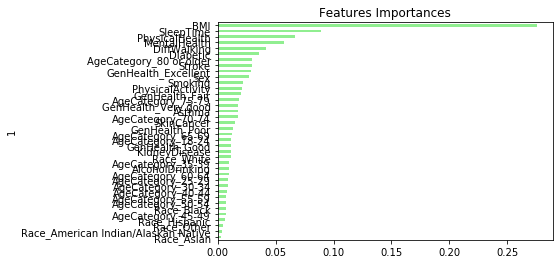

In [55]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
k = 5

In [ ]:
Kf = KFold(n_splits=k, shuffle=True, random_state=78)
scores = cross_val_score(rf_model, X, y, cv=Kf, scoring="accuracy")

In [ ]:
print("Cross-Validation Accuracy: {:.2f}".format(scores.mean()))
print("Cross-Validation Precision: {:.2f}".format(scores.mean()))
print("Cross-Validation Recall: {:.2f}".format(scores.mean()))
print("Cross-Validation F1 Score: {:.2f}".format(scores.mean()))